In [2]:
import matplotlib.pyplot as plt
import csv
from datetime import datetime
from dateutil.parser import parse
import pandas as pd

import matplotlib
import csv
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from sklearn import cross_validation
from sklearn import metrics
from sklearn import preprocessing
from sklearn import svm
from datetime import timedelta
import pandas as pd
import seaborn as sb
from sklearn.cluster import DBSCAN 
from collections import Counter

%matplotlib inline

In [4]:
'''Read CSV file and set index to timestamp'''
df = pd.read_csv('karl7.csv',low_memory=False, parse_dates= ['Timestamp'])
df = df.set_index('Timestamp')
df.head()



,States
Timestamp,
2018-07-03 10:09:54,6312
2018-07-03 10:10:37,2977
2018-07-03 10:11:13,2987
2018-07-03 10:11:37,2991
2018-07-03 10:12:05,2974


In [6]:
'''Replace all missing values with zero'''
#df1 = pd.DataFrame()
#df1 = df.replace('unknown', 2300)

'''Normalization of state data to have a mean of 0 and and SD of 1'''
#df['ScaledStates'] = df['States'] / df['States'].max()
#df.head()
df['ScaledStates'] = (df['States'] - df['States'].mean()) / df['States'].std()
#

#df.loc[df['States'] == 'unknown']





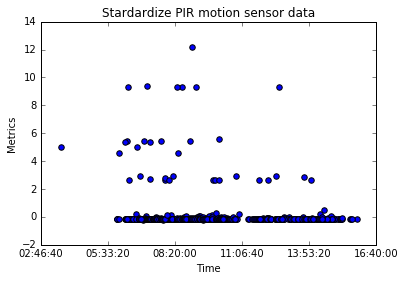

In [8]:
from pandas.plotting import scatter_matrix

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df.index.time, df.ScaledStates, c='b', s= 30)
#plt.plot(df.index.hour, df.ScaledStates)
#plt.legend(loc='upper left')
plt.ylabel('Metrics')
plt.xlabel('Time')
plt.title('Stardardize PIR motion sensor data')
plt.show()

In [9]:


'''Feature Extraction: Compute the mean, sum, and count for every 1 min'''
five_minutely_data = pd.DataFrame()
#five_minutely_data['ScaledStatesSum'] = df.ScaledStates.resample('60s', how='sum')
#five_minutely_data['ScaledStatesMean'] = df.ScaledStates.resample('60s', how='mean')
#five_minutely_data['ScaledStatesCount'] = df.ScaledStates.resample('60s', how='count')
#five_minutely_data['StatesCount'] = df.ScaledStates.resample('60s')
five_minutely_data['ScaledStatesCount'] = df['ScaledStates'].resample('60s').count()
five_minutely_data['ScaledStatesSum'] = df.ScaledStates.resample('60s').sum()
five_minutely_data['ScaledStatesMean'] = df.ScaledStates.resample('60s').mean()
five_minutely_data['ScaledStatesMin'] = df.ScaledStates.resample('60s').min()
five_minutely_data['ScaledStatesMax'] = df.ScaledStates.resample('60s').max()

'''Replace all missing values with zero'''
five_minutely_data1 = pd.DataFrame()
five_minutely_data1 = five_minutely_data.replace(np.nan, 0)

five_minutely_data1['Hour'] = five_minutely_data1.index.hour
five_minutely_data1['Min'] = five_minutely_data1.index.minute
five_minutely_data1['Sec'] = five_minutely_data1.index.second
#five_minutely_data1['Date'] = five_minutely_data1.index.date

five_minutely_data1.head()

,ScaledStatesCount,ScaledStatesSum,ScaledStatesMean,ScaledStatesMin,ScaledStatesMax,Hour,Min,Sec
Timestamp,,,,,,,,
2018-07-03 10:09:00,1,5.578842,5.578842,5.578842,5.578842,10,9,0
2018-07-03 10:10:00,1,-0.164043,-0.164043,-0.164043,-0.164043,10,10,0
2018-07-03 10:11:00,2,-0.286757,-0.143378,-0.146822,-0.139934,10,11,0
2018-07-03 10:12:00,2,-0.316031,-0.158016,-0.169209,-0.146822,10,12,0
2018-07-03 10:13:00,0,0.000000,0.000000,0.000000,0.000000,10,13,0


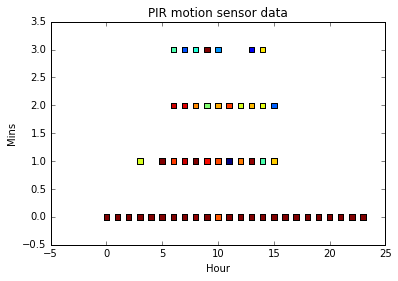

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(five_minutely_data1.index.hour, five_minutely_data1.ScaledStatesCount, c= five_minutely_data1.Min, s= 30,  marker = "s", label ='Test' )

#plt.legend(loc='upper left')
plt.ylabel('Mins')
plt.xlabel('Hour')
plt.title('PIR motion sensor data')
plt.show()

In [21]:
'''Kmeans cluster techniques'''
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(five_minutely_data1)

five_minutely_data1['labels'] = kmeans.labels_
#five_minutely_data1.head()

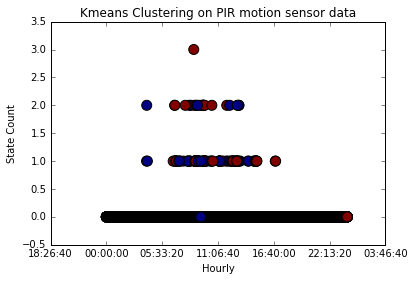

In [22]:
c = kmeans.labels_
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(five_minutely_data1.index.time, five_minutely_data1.ScaledStatesCount, c=c, s= 100 )

#plt.legend(loc='upper left')
plt.ylabel('State Count')
plt.xlabel('Hourly')
plt.title('Kmeans Clustering on PIR motion sensor data')
plt.show()

In [14]:
'''DBSCAN cluster techniques'''

model = DBSCAN(eps= 0.8, min_samples= 50).fit(five_minutely_data1)
print(model)


DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    min_samples=50, n_jobs=1, p=None)


In [15]:
five_minutely_data1['labels'] = model.labels_ 
#five_minutely_data1.head(600)

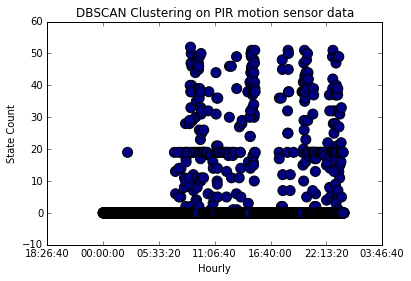

In [16]:

c = model.labels_
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(five_minutely_data1.index.time, five_minutely_data1.ScaledStatesCount, c=c, s= 100 )

#plt.legend(loc='upper left')
plt.ylabel('State Count')
plt.xlabel('Hourly')
plt.title('DBSCAN Clustering on PIR motion sensor data')
plt.show()

In [199]:
'''Read CSV file and set index to timestamp'''
df1 = pd.read_csv('orders12t.csv',low_memory=False, parse_dates= ['Timestamp'])
df1 = df1.set_index('Timestamp')

'''Normalization of state data to have a mean of 0 and and SD of 1'''

df1['ScaledStates'] = (df1['States'] - df1['States'].mean()) / df1['States'].std()

'''Feature Extraction: Compute the mean, sum, and count for every 1 min'''
five_minutely_data2 = pd.DataFrame()
five_minutely_data2['ScaledStatesCount'] = df1['ScaledStates'].resample('60s').count()
five_minutely_data2['ScaledStatesSum'] = df1.ScaledStates.resample('60s').sum()
five_minutely_data2['ScaledStatesMean'] = df1.ScaledStates.resample('60s').mean()

'''Replace all missing values with zero'''
five_minutely_data3 = pd.DataFrame()
five_minutely_data3 = five_minutely_data2.replace(np.nan, 0)
five_minutely_data3['Hour'] = five_minutely_data1.index.hour
five_minutely_data3['Min'] = five_minutely_data1.index.minute
five_minutely_data3['Sec'] = five_minutely_data1.index.second





In [32]:
from sklearn.model_selection import train_test_split  
train_data, test_data, train_target, test_target = train_test_split(five_minutely_data1, kmeans.labels_, train_size = 0.8)  
test_data.shape  

(288, 9)

In [60]:
model_ocsvm = svm.OneClassSVM(nu=0.07, kernel='rbf', gamma='auto') 
model_ocsvm.fit(train_data, train_target)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.07, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [61]:

from sklearn import metrics  
y_pred_test = model_ocsvm.predict(train_data)
targs = train_target
preds = y_pred_test

print("accuracy: ", metrics.accuracy_score(targs, preds))  
print("precision: ", metrics.precision_score(targs, preds))  
print("recall: ", metrics.recall_score(targs, preds))  
print("f1: ", metrics.f1_score(targs, preds))  
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))

accuracy:  0.391493055556
precision:  0.51425313569
recall:  0.776247848537
f1:  0.61865569273
area under curve (auc):  0.515094151939


In [37]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(targs, preds))  
print(classification_report(targs, preds)) 

[[  0   0   0]
 [138   0 433]
 [151   0 430]]
             precision    recall  f1-score   support

       -1.0       0.00      0.00      0.00         0
        0.0       0.00      0.00      0.00       571
        1.0       0.50      0.74      0.60       581

avg / total       0.25      0.37      0.30      1152

